# **Weather data outlier detection**

In [2]:
import pandas as pd               #Өгөгдөлтэй ажиллах функц
import seaborn as sns             #Өгөгдлийг дүрсэлж гаргах функц
import matplotlib.pyplot as plt   #Өгөгдлийг дүрсэлж гаргах функц
import numpy as np                #Тоон өгөгдөлтэй ажиллах функц

/home/barkowich/anaconda3/envs/ml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
humid = pd.read_csv('/home/barkowich/Documents/anaconda/ml/weather/21h.csv')
press = pd.read_csv('/home/barkowich/Documents/anaconda/ml/weather/21p.csv')
tempr = pd.read_csv('/home/barkowich/Documents/anaconda/ml/weather/21t.csv')

In [4]:
merged = humid
merged = merged.join(press, lsuffix="_left")          #тус бүрийн багануудыг нэгтгэнэ
merged = merged.join(tempr, lsuffix="_left" )
merged.shape                                          #Өгөгдлийн хэлбэр хэмжээг үзүүлнэ

(192718, 3)

In [5]:
merged.columns = ["Humidity", "Pressure", "Temperature"]      #Баганы нэрийг солих үйлдэл
merged.head()

,Humidity,Pressure,Temperature
0,0.742,1037.400000,-33.0
1,0.742,1037.033333,-33.0
2,0.668,1036.666667,-34.0
3,0.742,1036.300000,-33.0
4,0.673,1035.933333,-32.0


In [6]:
df = pd.DataFrame()
df['Timestamp'] = pd.DataFrame(pd.date_range(start="2010-01-01", end="2020-12-31", freq='30T'))
merged = merged.join(df, how = 'left')
merged.head()

,Humidity,Pressure,Temperature,Timestamp
0,0.742,1037.400000,-33.0,2010-01-01 00:00:00
1,0.742,1037.033333,-33.0,2010-01-01 00:30:00
2,0.668,1036.666667,-34.0,2010-01-01 01:00:00
3,0.742,1036.300000,-33.0,2010-01-01 01:30:00
4,0.673,1035.933333,-32.0,2010-01-01 02:00:00


## **Plotting datasets**

In [7]:
# Data Plot  
    
def plotvariable(df, variable):
    plt.figure(figsize=(16,4))
    #histogram
    plt.subplot(1,2,1)
    plt.hist(df[variable],alpha=0.5)

    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[variable])
    plt.show()

In [8]:
from scipy.stats import norm
def plot_bell(data,name_xlabel):
  plt.hist(data, bins=20, rwidth=0.8, density=True)
  plt.xlabel(name_xlabel)
  plt.ylabel('Count')

  rng = np.arange(data.min(), data.max(), 0.1)
  plt.plot(rng, norm.pdf(rng,data.mean(),data.std()))

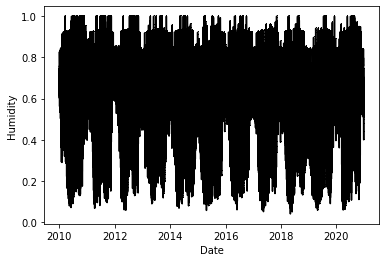

In [9]:
plt.plot(merged['Timestamp'], merged['Humidity'], color='black', marker=',')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

/home/barkowich/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


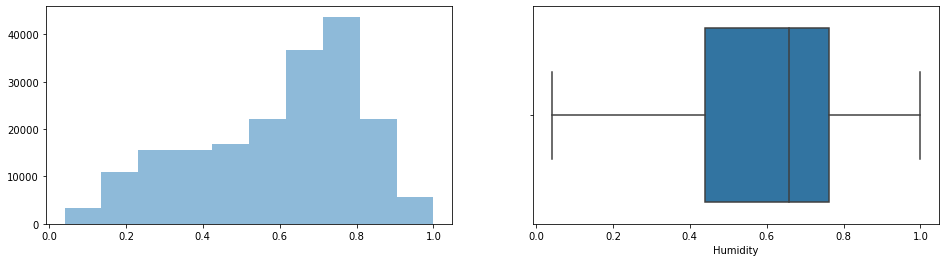

In [10]:
plotvariable(merged,'Humidity')

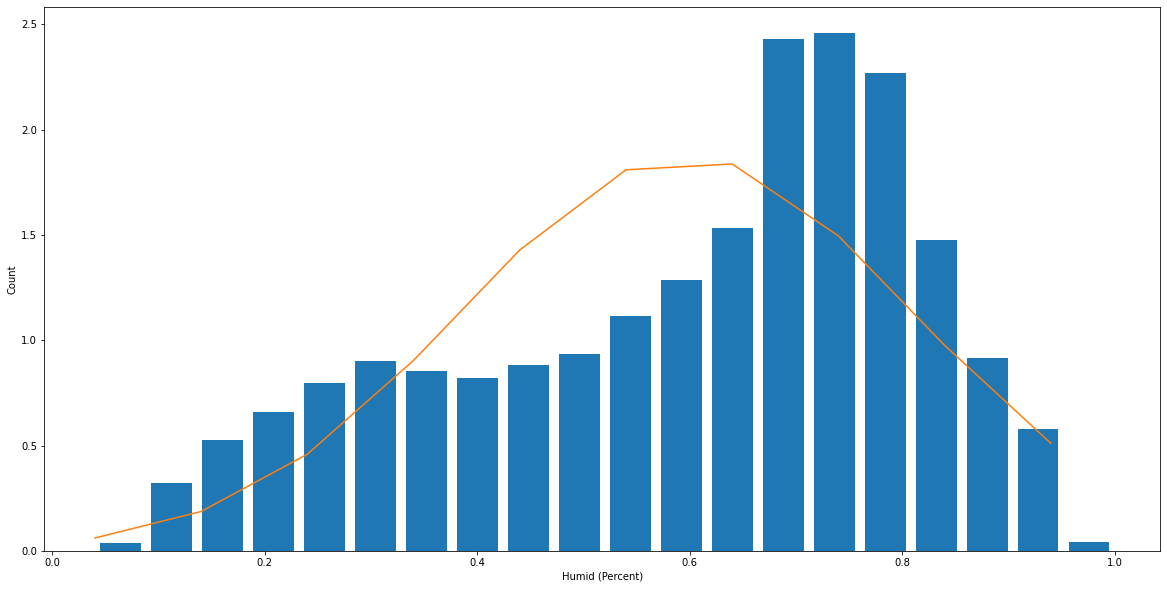

In [11]:
plot_bell(merged.Humidity, 'Humid (Percent)')

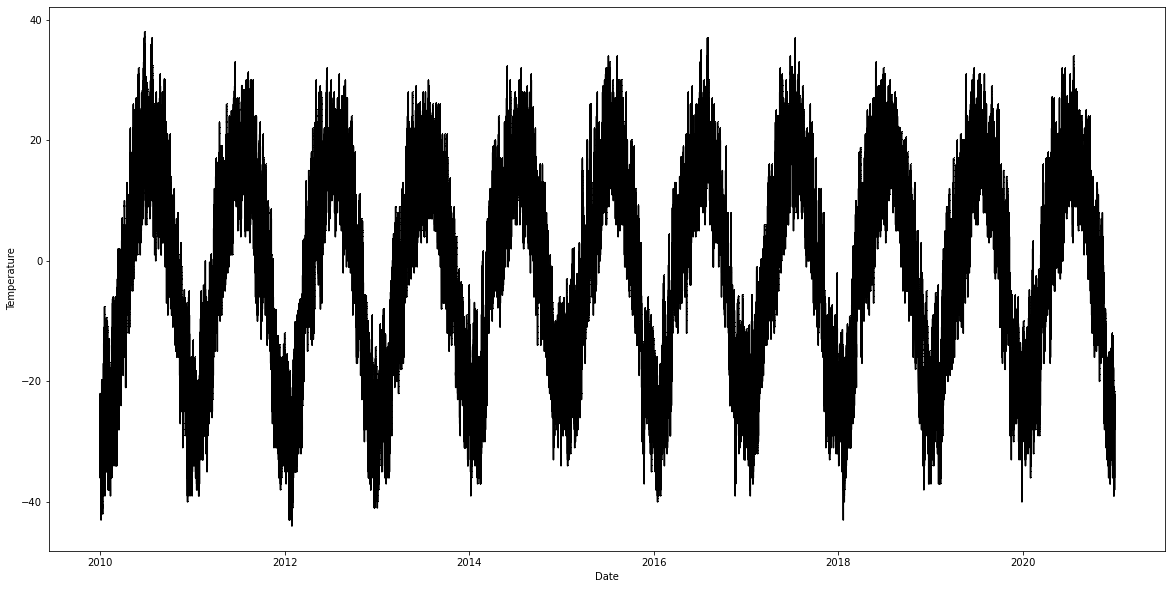

In [12]:
plt.plot(merged['Timestamp'], merged['Temperature'], color='black', marker=',')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

/home/barkowich/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


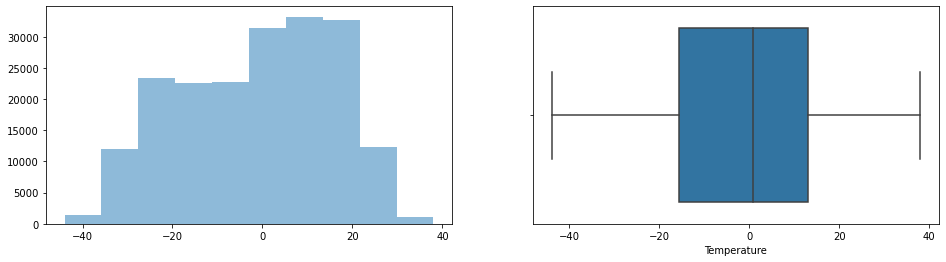

In [13]:
plotvariable(merged,'Temperature')

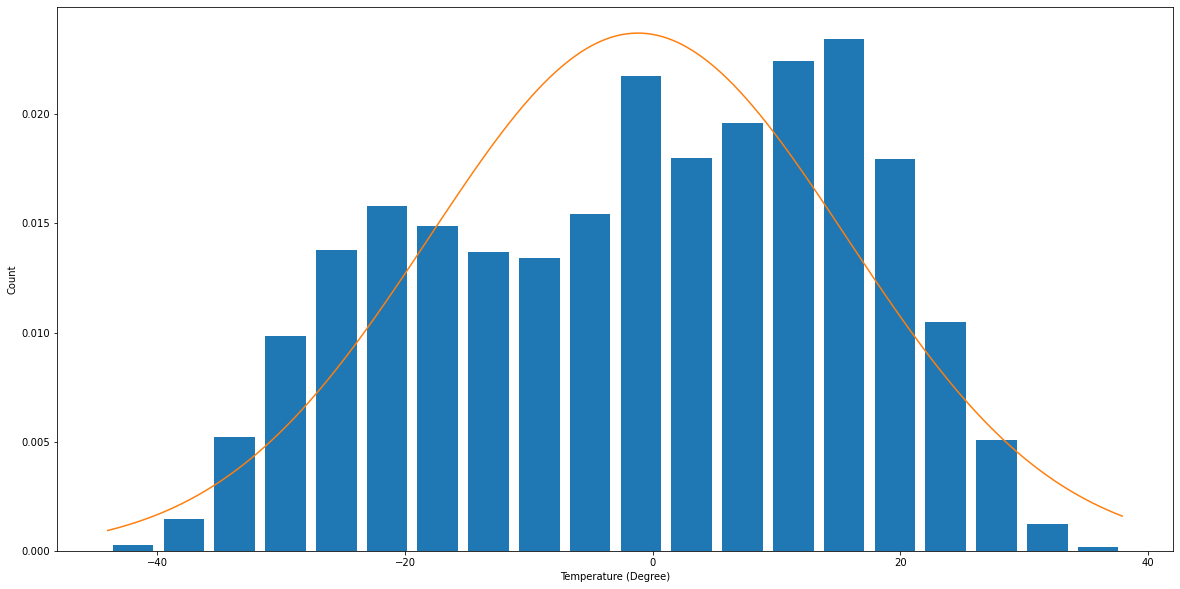

In [14]:
plot_bell(merged.Temperature, 'Temperature (Degree)')

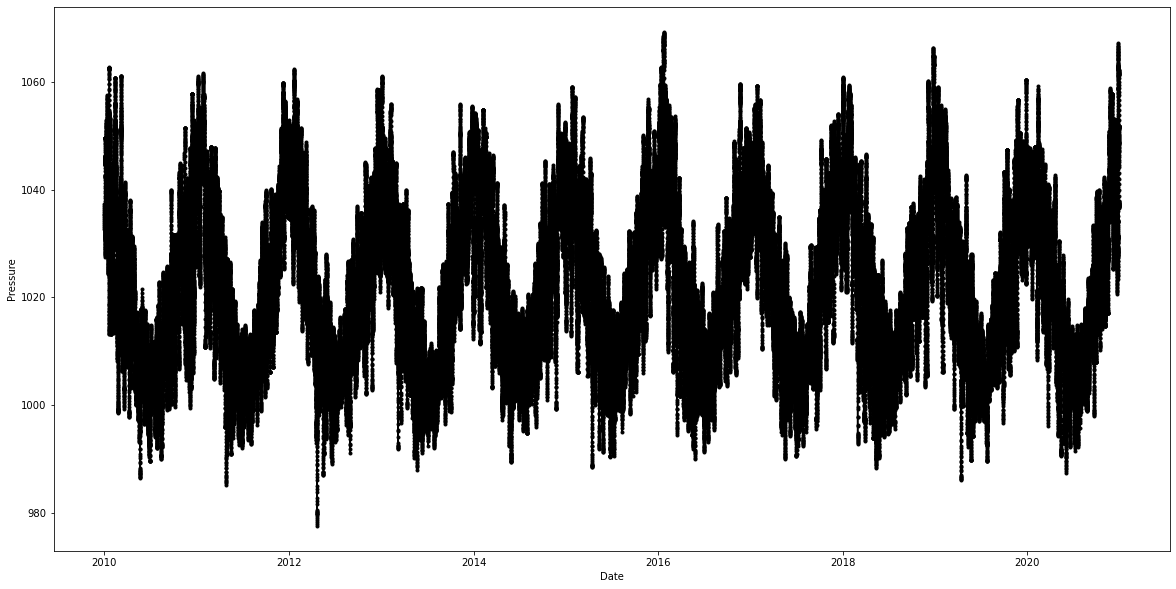

In [15]:
plt.plot(merged['Timestamp'], merged['Pressure'], color='black', marker='.')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

/home/barkowich/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


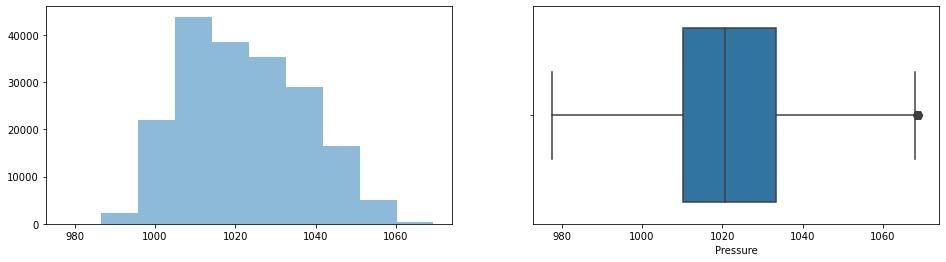

In [16]:
plotvariable(merged,'Pressure')

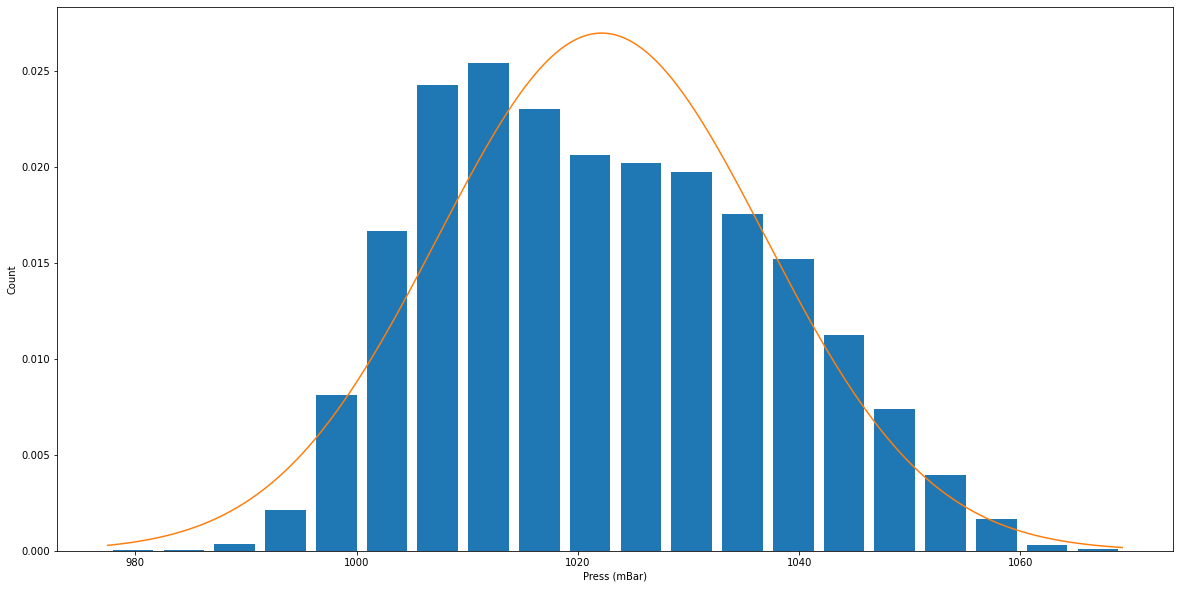

In [17]:
plot_bell(merged.Pressure, "Press (mBar)")

## **Detecting Outliers**

In [18]:
# outlier detection
def standart_division(data, threshhold = 3):
 upper_limit = data.mean() + threshhold * data.std()
 lower_limit = data.mean() - threshhold * data.std()
 return data[(data>upper_limit) | (data<lower_limit)]

In [19]:
## Даралтын утгаас бусад өгөгдлөөс outlier илрээгүй

standart_division(merged.Humidity, 3)

Series([], Name: Humidity, dtype: float64)

In [20]:
standart_division(merged.Pressure).head()

40395      977.500
106183    1066.700
106184    1066.925
106185    1067.150
106186    1067.375
Name: Pressure, dtype: float64

In [21]:
standart_division(merged.Temperature)

Series([], Name: Temperature, dtype: float64)

In [22]:
# Z-score аргаар outliers - ийг илрүүлэх

def z_score(data, name,threshhold=3):
  data_zscore = pd.DataFrame()
  data_zscore['Data'] = data
  data_zscore['zscore'] = ( data_zscore.Data - data_zscore.Data.mean() ) / data_zscore.Data.std()
  return data_zscore[(data_zscore.zscore < -threshhold) | (data_zscore.zscore > threshhold)]

In [23]:
z_score(merged.Humidity, 'Humidity',3)

,Data,zscore


In [24]:
raw_dat = z_score(merged.Pressure, 'Pressure') 
# Зөвхөн даралтын утгаас outliers илэрсэн

In [25]:
z_score(merged.Temperature, 'Temperature')

,Data,zscore


In [26]:
raw_dat['outlier'] = 1
merged = merged.join(raw_dat.outlier).fillna(0)
merged[merged['outlier']==1].sum()

/tmp/ipykernel_4994/1020422727.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged[merged['outlier']==1].sum()


Humidity          30.235500
Pressure       51160.166667
Temperature    -1493.400000
outlier           48.000000
dtype: float64

## **Decision Tree**

In [27]:
data = pd.DataFrame()
data = merged
data['humid_zscore'] = ( data.Humidity - data.Humidity.mean() ) / data.Humidity.std()
data['tempr_zscore'] = ( data.Temperature - data.Temperature.mean() ) / data.Temperature.std()
data['press_zscore'] = ( data.Pressure - data.Pressure.mean() ) / data.Pressure.std()
data = data[['Humidity','humid_zscore','Temperature','tempr_zscore','Pressure','press_zscore','outlier']]

In [28]:
data

,Humidity,humid_zscore,Temperature,tempr_zscore,Pressure,press_zscore,outlier
0,0.742,0.682175,-33.0,-1.891018,1037.400000,1.030914,0.0
1,0.742,0.682175,-33.0,-1.891018,1037.033333,1.006127,0.0
2,0.668,0.334287,-34.0,-1.950481,1036.666667,0.981339,0.0
3,0.742,0.682175,-33.0,-1.891018,1036.300000,0.956552,0.0
4,0.673,0.357793,-32.0,-1.831554,1035.933333,0.931765,0.0
...,...,...,...,...,...,...,...
192713,0.688,0.428310,-26.0,-1.474775,1037.500000,1.037674,0.0
192714,0.686,0.418908,-27.0,-1.534238,1037.350000,1.027534,0.0
192715,0.623,0.122733,-27.0,-1.534238,1037.200000,1.017394,0.0
192716,0.683,0.404804,-28.0,-1.593701,1037.050000,1.007253,0.0


### Node class

In [29]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

### Tree class

In [30]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

### Train Test Split

In [39]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=41)

## **Fit the Model**

In [41]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)
classifier.print_tree()

KeyboardInterrupt: 

### **Test Model**

In [ ]:
Y_pred = classifier.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)